## **First Look**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
path = '/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/Motor_Vehicle_Collisions_-_Crashes_20251208.csv'

df = pd.read_csv(path, parse_dates=['CRASH DATE'])
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2022-01-01,7:33,NaN,NaN,40.771477,-73.918240,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4491400,Sedan,NaN,NaN,NaN,NaN
1,2022-01-01,4:30,NaN,NaN,NaN,NaN,NaN,Southern parkway,Jfk expressway,NaN,...,Unspecified,NaN,NaN,NaN,4491626,Sedan,Sedan,NaN,NaN,NaN
2,2022-01-01,7:57,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,SHERIDAN EXPRESSWAY,NaN,...,NaN,NaN,NaN,NaN,4491734,Sedan,NaN,NaN,NaN,NaN
3,2022-01-01,5:17,NaN,NaN,40.746930,-73.848660,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,NaN,NaN,...,Unsafe Lane Changing,NaN,NaN,NaN,4491857,Sedan,Sedan,NaN,NaN,NaN
4,2022-01-01,1:30,NaN,NaN,40.819157,-73.960380,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4491344,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369996,2025-12-02,10:38,BRONX,10475.0,40.884712,-73.831300,"(40.884712, -73.8313)",DYRE AVE,BOSTON RD,NaN,...,NaN,NaN,NaN,NaN,4861707,Sedan,NaN,NaN,NaN,NaN
369997,2025-12-02,19:05,BRONX,10451.0,40.814716,-73.922070,"(40.814716, -73.92207)",NaN,NaN,328 E 145 ST,...,Unspecified,NaN,NaN,NaN,4861762,Sedan,Sedan,NaN,NaN,NaN
369998,2025-12-02,20:21,BROOKLYN,11219.0,40.639004,-74.000400,"(40.639004, -74.0004)",NaN,NaN,948 50 ST,...,NaN,NaN,NaN,NaN,4861807,Sedan,NaN,NaN,NaN,NaN
369999,2025-12-02,5:50,NaN,NaN,40.709960,-73.989334,"(40.70996, -73.989334)",FDR DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4861697,Sedan,NaN,NaN,NaN,NaN


# Cleaning

In [48]:
# cleaning column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

In [49]:
print("------------------ Total NaNs per Column -------------------")
display(df.isna().sum())
print("------------------ Column Types -------------------")
display(df.dtypes)

------------------ Total NaNs per Column -------------------


crash_date                            0
crash_time                            0
borough                          107666
zip_code                         107718
latitude                          24170
longitude                         24170
location                          24170
on_street_name                   105048
cross_street_name                180849
off_street_name                  264957
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1      2492
contributing_factor_vehicle_2     87627
contributing_factor_vehicle_3    336544
contributing_factor_vehicle_4    361202
contributing_factor_vehicle_5    367372
collision_id                          0
vehicle_type_code_1                5943


------------------ Column Types -------------------


crash_date                       datetime64[ns]
crash_time                               object
borough                                  object
zip_code                                float64
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
cross_street_name                        object
off_street_name                          object
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3           

# Feature Engineering

In [50]:
# new column: month
df['month'] = df['crash_date'].dt.month
df['month'].value_counts()

month
5     34287
6     33118
10    32979
9     32553
7     32029
3     31930
8     31563
4     30401
11    30328
1     29361
2     27091
12    24361
Name: count, dtype: int64

In [51]:
list(range(6))

[0, 1, 2, 3, 4, 5]

In [52]:
# new column: season

season = []

for x in df['month']:
    if x in [12,1,2]:
        season.append('Winter')
    elif x in [3,4,5]:
        season.append('Spring')
    elif x in [6,7,8]:
        season.append('Summer')
    elif x in [9,10,11]:
        season.append('Fall')
    else:
        season.append('Error')

df['season'] = season
df['season'].value_counts()

season
Summer    96710
Spring    96618
Fall      95860
Winter    80813
Name: count, dtype: int64

## Debo's Part: Creating is_electric

In [53]:
from thefuzz import process

In [54]:
def detect_electric(raw): # function to detect electric vehicles
    if not isinstance(raw, str): # if the input is not a string, return None
        return None
    s = raw.lower() # convert to lowercase for easier matching

    if any(k in s for k in ["e-bike", "ebike", "e bike"]):
        return "Electric Bike"
    if any(k in s for k in ["e-scooter", "escooter", "e scooter"]):
        return "Electric Scooter"
    if any(k in s for k in ["electric m", "e-motor", "e motor", "e motorcycle"]):
        return "Electric Motorcycle"
    if any(k in s for k in ["one wheel", "hoverboard", "ninebot", "unicycle"]):
        return "Electric Unicycle / One-Wheel"
    if "electric" in s or "e-" in s:
        return "Electric Other"

    return None # leaves as None if no electric keywords found


In [55]:
df.columns[:][24:29]

Index(['vehicle_type_code_1', 'vehicle_type_code_2', 'vehicle_type_code_3',
       'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

In [56]:
vehicle_cols = list(df.columns[:][24:29])


unique_vehicles = pd.unique(df[vehicle_cols].values.ravel()) # makes 1-dimensional and only takes each value once

unique_vehicles = sorted([v for v in unique_vehicles if pd.notna(v)]) # sorted list without missing values

unique_vehicles # displays all unique vehicle types in the dataset. helps to preview before making categories

['-',
 '.',
 '0',
 '000',
 '0000',
 '09',
 '10 Paaseng',
 '100th truc',
 '12 PASSENG',
 '13',
 '16m',
 '17',
 '18 WHEELER',
 '18 wheeler',
 '2',
 '2 dr sedan',
 '2 wheel sc',
 '263',
 '2YDSWHEELL',
 '3 Wheel Sc',
 '3 Wheel Ve',
 '3-Door',
 '325FLCR',
 '340AJ',
 '4',
 '4 dr sedan',
 '4 wheeler',
 '4door',
 '4dsd',
 '5',
 '50CC SCOOT',
 '50cc mini',
 '7',
 '787',
 '997',
 '999',
 'A',
 'A bulance',
 'A,n',
 'ABMU',
 'ABULANCE',
 'ACCESS A R',
 'ACCESS RID',
 'ACCESS-ARI',
 'ACUR',
 'ALL TERRAI',
 'AMAZON TRU',
 'AMAZON VAN',
 'AMB',
 'AMBALANCE',
 'AMBLUANCE',
 'AMBU',
 'AMBULACE',
 'AMBULANCE',
 'AMBULANCE`',
 'AMBULANE',
 'AMBULANVE',
 'AMBULENCE',
 'AMBULETTE',
 'AMSGC',
 'AMULANCE',
 'APP',
 'APPORTIONE',
 'ARCIMOTO',
 'ARMORED TR',
 'ASPHALT RO',
 'ATTECHMENT',
 'AUTOTRLR T',
 'Access A R',
 'Access a R',
 'Access-A-R',
 'All-Terrain Vehicle',
 'Amazon Van',
 'Amazon del',
 'Amazon tru',
 'Amazon van',
 'Amb',
 'Ambu',
 'Ambulance',
 'Ambulances',
 'Ambulence',
 'Ambulette',
 'Appor

In [57]:
motor_categories = [ # list of motor vehicle categories to fuzzymatch
    "Sedan", "SUV", "Taxi", "Pickup Truck", "Van", "Truck", "Bus",
    "Motorcycle", "Moped", "Scooter", "Ambulance", "Fire Truck",
    "Garbage Truck", "Delivery Truck", "Forklift / Construction",
    "Trailer", "Government Vehicle", "Commercial Vehicle", "Unknown"
]


In [58]:
def fuzzy_motor_class(raw): # function to match motor catagories
    if not isinstance(raw, str): # if the input is not a string, return Unknown
        return "Unknown"
    clean = raw.strip() # remove leading and trailing whitespace

    match, score = process.extractOne(clean, motor_categories) # returns motor catagory if match score is high enough

    
    return match if score >= 70 else "Unknown" # adjust threshold depending on how wild the data is


In [59]:
def classify_vehicle(raw): # applies functions to dataframe
    electric = detect_electric(raw) # skips fuzzy matching if electric is detected
    if electric is not None: 
        return electric # means the vehicle is electric
    return fuzzy_motor_class(raw) # otherwise, applies fuzzy matching


In [60]:
df['VEHICLES COMBINED'] = df[vehicle_cols].fillna('').agg(' | '.join, axis=1) 
# fills missing values with an empty space, then combines vehicle type columns into one string per row. makes it easier to run fuzzy matching
#  or electric detection on all vehicles in the crash at once, instead of checking each column individually. **IMPORTANT** technically losing data because it puts
# all vehicle types into one string, but for this analysis it's acceptable(Note as constraint).

df["VEHICLE CLEAN"] = df["VEHICLES COMBINED"].apply(lambda x: classify_vehicle(x)) # applies fuzzy matching and electric detection to the combined vehicle types

df["VEHICLE CLEAN"] = df["VEHICLE CLEAN"] # jupyter kept forgetting what was in this column so i just redefined it

df["VEHICLE CLEAN"].value_counts()

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  | 

VEHICLE CLEAN
Sedan                            154019
Government Vehicle               149494
Pickup Truck                      14175
Unknown                           13562
Electric Bike                      8202
Taxi                               6725
Truck                              5966
Electric Scooter                   5021
Motorcycle                         3976
Bus                                2412
Ambulance                          1619
Van                                1497
Moped                              1377
Garbage Truck                       806
Scooter                             497
Fire Truck                          149
Delivery Truck                      136
Trailer                             119
SUV                                  93
Forklift / Construction              56
Electric Other                       37
Commercial Vehicle                   33
Electric Motorcycle                  19
Electric Unicycle / One-Wheel        11
Name: count, dtype: int64

In [61]:
electric_categories = [
    "Electric Bike",
    "Electric Scooter",
    "Electric Motorcycle",
    "Electric Unicycle / One-Wheel",
    "Electric Other"
]


df["is_electric"] = df["VEHICLE CLEAN"].apply(lambda x: 1 if x in electric_categories else 0)


print(df["is_electric"].value_counts())
print(f'\n',df["is_electric"].value_counts(normalize=True))

is_electric
0    356711
1     13290
Name: count, dtype: int64

 is_electric
0    0.964081
1    0.035919
Name: proportion, dtype: float64


In [69]:
df_filtered = df[['crash_date', 'number_of_persons_injured', 'month', 'season', 'is_electric']]

# EDA

In [62]:
# total number of people injured from motor vehicle collisions
print(df['number_of_persons_injured'].sum())
display(df['number_of_persons_injured'].value_counts())

205869


number_of_persons_injured
0     216375
1     120031
2      22283
3       7219
4       2501
5        901
6        370
7        140
8         71
9         28
10        25
11        15
13        11
15        10
12         7
14         3
17         3
20         2
40         1
21         1
23         1
34         1
18         1
25         1
Name: count, dtype: int64

/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_41219/3240691189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(df, x='season', y='number_of_persons_injured', palette='pastel', estimator='sum')


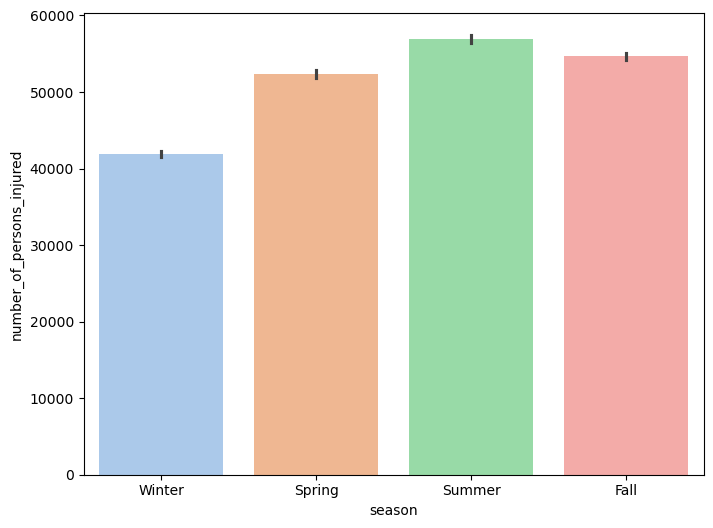

In [63]:
plt.figure(figsize=[8,6])
ax = sns.barplot(df, x='season', y='number_of_persons_injured', palette='pastel', estimator='sum')

## Debo's EDA: Plotting

/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_41219/109039816.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_injuries.index, y=season_injuries.values, palette='viridis')


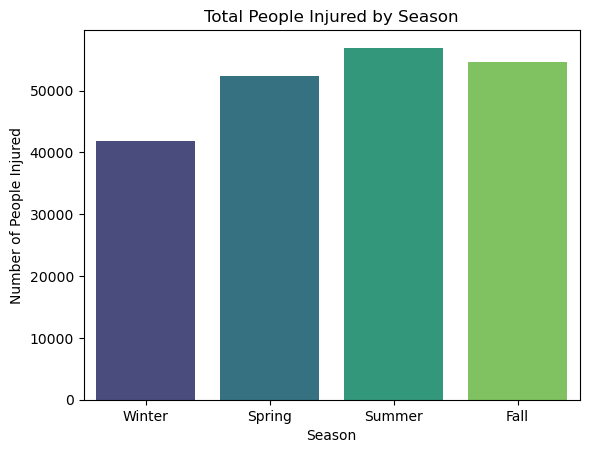

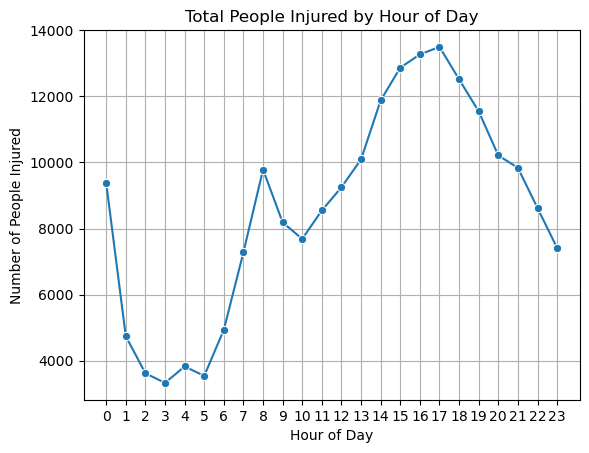

In [70]:

df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M', errors='coerce').dt.hour

season_injuries = df.groupby('season')['number_of_persons_injured'].sum().reindex(['Winter','Spring','Summer','Fall'])



sns.barplot(x=season_injuries.index, y=season_injuries.values, palette='viridis')
plt.title('Total People Injured by Season')
plt.ylabel('Number of People Injured')
plt.xlabel('Season')
plt.show()


hour_injuries = df.groupby('crash_time')['number_of_persons_injured'].sum()



sns.lineplot(x=hour_injuries.index, y=hour_injuries.values, marker='o')
plt.title('Total People Injured by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of People Injured')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

In [71]:
df_filtered.to_csv('/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/filtered_collisions.csv')